# **Introduction**
Bellabeat is a high-tech company that manufactures health-focused smart products including the Bellabeat app, Leaf, Time and Spring. It also offers a subscription-based membership program for users giving them access to personalised guidance on having a healthy lifestyle. Bellabeat has positioned itself as a tech-driven wellness company for women.

Bellabeat has been investing extensively on digital marketing including Google Search and being active on social media platforms. The co-founder Urska Sršen knows that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth.

# **Scenario**

Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška believes that analyzing smartdevice fitness data could help unlock new growth opportunities for the company. I have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights I discover will then help guide marketing strategy for the company. I will then present my analysis to the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing strategy.

# **Business Task**
Conduct an analysis of non-Bellabeat smart device usage data to gain valuable insights into customer behavior and provide recommendations on how to apply these insights to optimize marketing strategy for a Bellabeat product.

# **Data Background**

* 18 CSV files containing a variety of data recorded and stored by Bellabeat's competitor Fitbit found here https://www.kaggle.com/arashnic/fitbit
* Data was collected over a monthlong period in 2016
* 33 unique users participated in all or part of the study
* 24 of those users tracked sleep
* 8 of those users logged their weight once or more

# **Method**

For this analysis I decided to use SQL to process, clean and organize the data and Tableau to analyze and share results. 

# **Analysis**
**1.1 Steps & Weight loss**

After reviewing, sorting, and filtering the raw data I came up with my first hypthesis to test: 
- Steps per day is positively correlated with weightloss

To test this I used SQL to combine the *dailyActivity_merged* & *weightLogInfo_merged* csv files based on the unique ID key both files share:

In [ ]:
SELECT ##This selects which old or new columns will be displayed from the Join statement
  avgsteps.Id,
  avgsteps.Stepsperday,
  weight.MaxWeight,
  weight.MinWeight,
  weight.Weightloss
FROM
  (SELECT ##This subquery does the calcs for 'avgsteps' table
     Id,
     AVG(TotalSteps) AS Stepsperday
   FROM
     `bellabeat-case-study-399116.fitbit_activity_summary.daily_activity`
   GROUP BY
     Id
  ) AS avgsteps
INNER JOIN
  (SELECT ##This subquery does the calcs for 'weight' table
     Id,
     MAX(WeightPounds) AS MaxWeight,
     MIN(WeightPounds) AS MinWeight,
     MAX(WeightPounds) - MIN(WeightPounds) AS Weightloss
   FROM
     `bellabeat-case-study-399116.fitbit_activity_summary.weightLogInfo`
   GROUP BY
     Id
    HAVING
      COUNT(*) > 1 ##Only include IDs with more than one weight log entry = 6 users
  ) AS weight
ON
  avgsteps.Id = weight.Id ON statement provides which column to combine and aggregate
  

I used this query to aggregate and clean the data from both these tables. It calculates the average total steps per day per user and the total weight lost per user over the testing period. When reviewing the CSV files I noticed some users only logged weight once or less so to filter those out I used a HAVING statement and COUNT function to generate only users who logged weight more than once to reflect an accurate dataset. After running the query I learned only 6 of the 8 users who logged weight were eligible for the analysis.

After cleaning and merging the two tables I exported the new table and imported it into Tableau to visualize any trends between average steps taken and weight lost. I decided to use a scatterplot with Weight loss on the Y-axis (dependent variable) and Steps per day on the x-axis (independent variable):

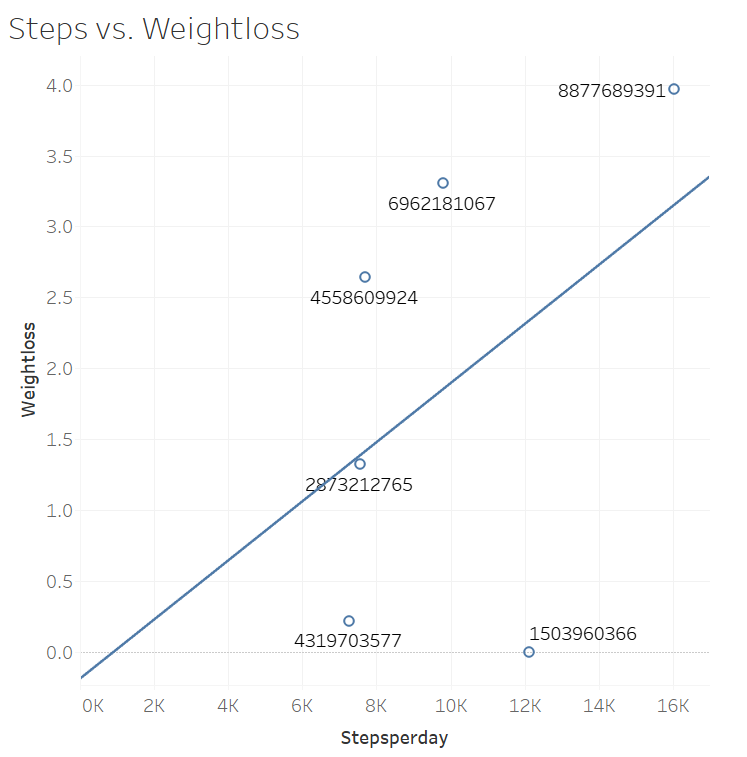

**Conclusion:** With a R coefficient of only .19 it can be concluded there's little correlation between steps and weight loss in this dataset. I am skeptical of this conclusion however due to the limited sample size of users and length of time during the testing period. While I can't definitively say there is a relationship between these two variables, I also can't definitively say there isn't.

**1.2 Workout Times**

During my review I also noticed certain times of day seemed to be more popular than others for working out leading to my second hypothesis:
* Users tend to workout more at certain points in the day over others

To test this I queried the csv file *hourlyCalories_merged* in SQL:

In [ ]:
SELECT
    ID,
    DATE(ActivityHour) AS Date,
    TIME(ActivityHour) AS Time,
    Calories
FROM 
  `bellabeat-case-study-399116.fitbit_activity_summary.hourlyCalories` LIMIT 1000

In the file the column containing the hour of the day recorded was combined with date so in SQL I utilized the DATE and TIME function to split the column into two columns respectively. 

From there I exported my new table out of SQL and imported it into Tableau for analysis:

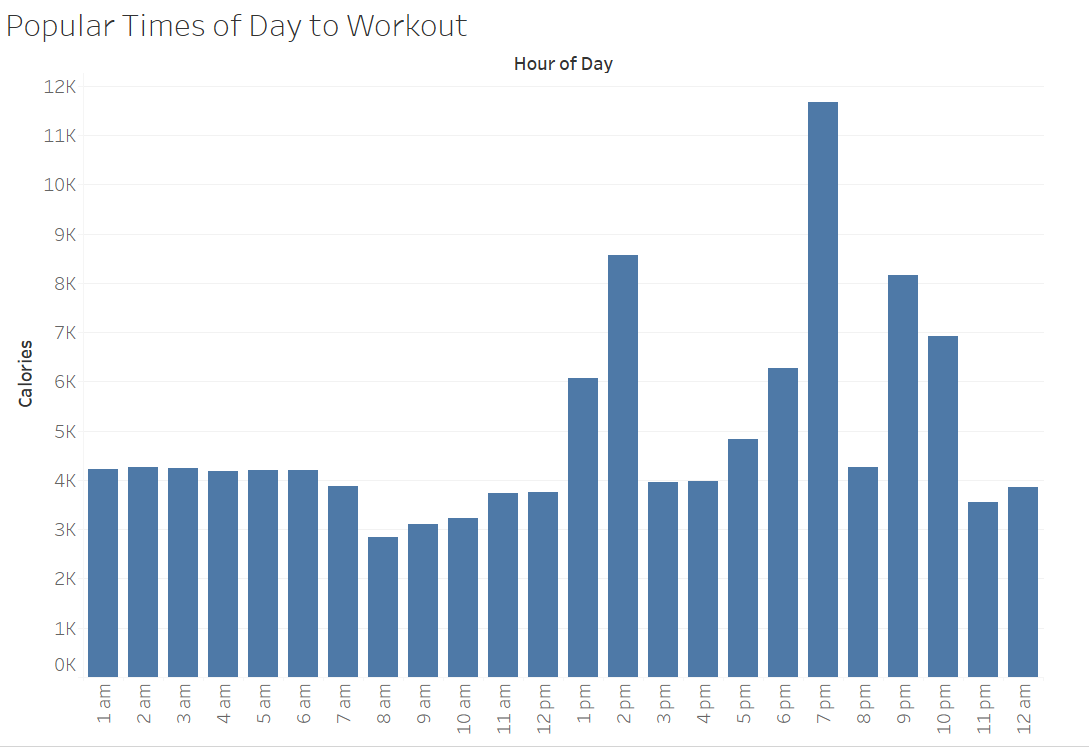

**Conclusion:** Based on the bar chart generated there certainly seems to be certain hours of the day users preferred to workout over others. As expected the more popular times tend to fall in hours when most users would be awake. Bigger spikes appear to occur around lunch and evening hours indicating this sample of users enjoyed working out during breaks and after finishing work.

**1.3 Activity Levels**

When sifting through the file *dailyIntensities_merged* I also noticed there seemed to be a large variance in how many minutes users tend to spend in different intensity levels. The table defined these levels under 4 broad buckets:

1. Sedentary
1. Lightly Active
1. Fairly Active
1. Very Active

My review led me to my third and final hypotheis:

* Users tend to be less active than more throughout the day

To test this I once again utilized SQL to clean and organize the data:

In [ ]:
SELECT
  AVG(SedentaryMinutes)/60
FROM 
  `bellabeat-case-study-399116.fitbit_activity_summary.dailyIntensities`
--------------------------------------------------------------------
SELECT
  AVG(LightlyActiveMinutes)/60
FROM 
  `bellabeat-case-study-399116.fitbit_activity_summary.dailyIntensities`
--------------------------------------------------------------------
SELECT
  AVG(FairlyActiveMinutes)/60
FROM 
  `bellabeat-case-study-399116.fitbit_activity_summary.dailyIntensities`
--------------------------------------------------------------------
SELECT
  AVG(VeryActiveMinutes)/60
FROM 
  `bellabeat-case-study-399116.fitbit_activity_summary.dailyIntensities`

Before visualizing I first wanted to generate a summary of the intensity levels in hours to make it more disgestible for stakeholders. After running the above queries I got the following results:

**Summary Metrics**

* Average Sedentary hours per day : 16.5 hrs

* Average Lightly Active hours per day: 3.2 hrs

* Average Fairly Active hours per day: .23 hrs

* Average Very Active hours per day: .35 hrs

From this preliminary analysis it appear my hypothesis may hold water but I still needed a way to show this more effectively so I revisited SQL:

In [ ]:
SELECT
  LightlyActiveSum,
  FairlyActiveSum,
  VeryActiveSum,
  SedentarySum,
  TotalSum,
  CONCAT(ROUND((LightlyActiveSum / TotalSum) * 100, 2), '%') AS LightlyActivePercentage,
  CONCAT(ROUND((FairlyActiveSum / TotalSum) * 100, 2), '%') AS FairlyActivePercentage,
  CONCAT(ROUND((VeryActiveSum / TotalSum) * 100, 2), '%') AS VeryActivePercentage,
  CONCAT(ROUND((SedentarySum / TotalSum) * 100, 2), '%') AS SedentaryPercentage
FROM (
    SELECT
      SUM(LightlyActiveMinutes) AS LightlyActiveSum,
      SUM(FairlyActiveMinutes) AS FairlyActiveSum,
      SUM(VeryActiveMinutes) AS VeryActiveSum,
      SUM(SedentaryMinutes) AS SedentarySum,
      SUM(LightlyActiveMinutes + FairlyActiveMinutes + VeryActiveMinutes + SedentaryMinutes) AS TotalSum
    FROM `bellabeat-case-study-399116.fitbit_activity_summary.dailyIntensities`
) AS sum_minutes;


My intention with this query was to generate a one row output to feed into Tableau. While I know Tableau can perform aggregations and calculations of this level I wanted to practice conducting calculations in SQL. In the above query I applied a subquery to sum each activity level's minutes and the sum of all activity levels as a whole. I then used the CONCAT and ROUND functions to display each of these as a percentage of total minutes.

Once produced I took that ouput to Tableau for visualization:

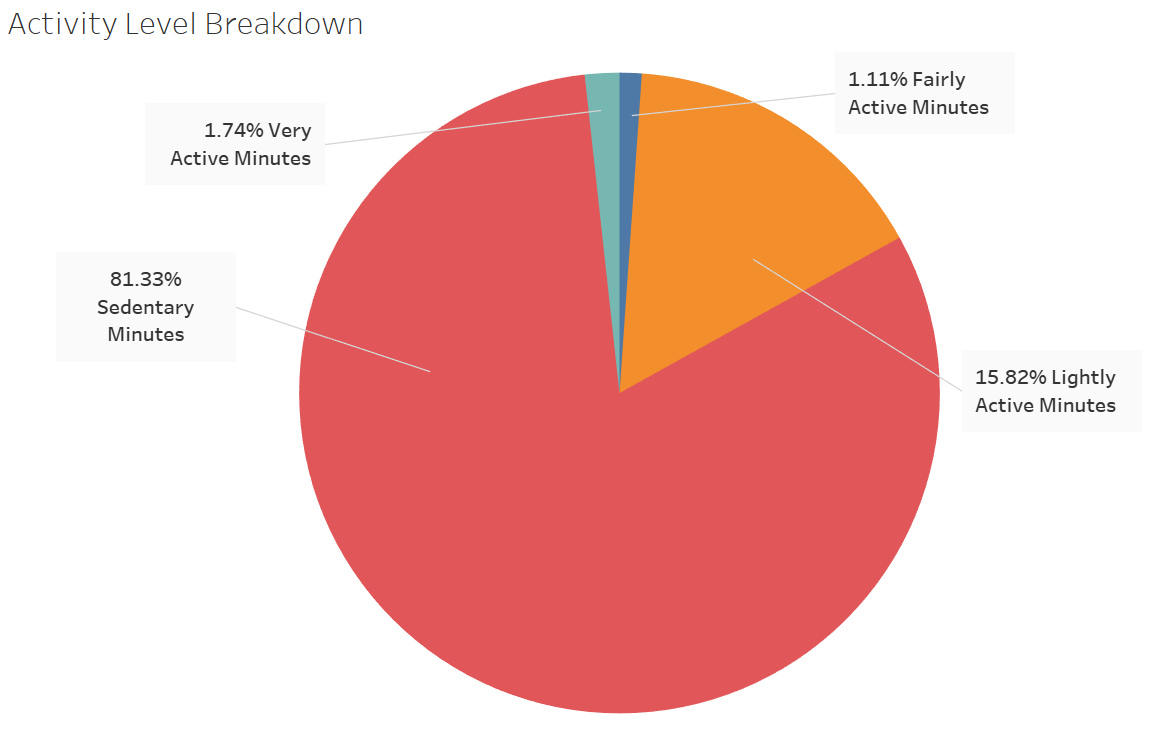

**Conclusion:** With the goal to compare each activity level apportionment to one another I decided a pie chart was of best use in this scenario. Based on this visualization I can state with confidence my hypothesis is correct. Over 97% of minutes recorded falls within the lower two activity level buckets with a staggering 81% of that being Sedentary.

# **Recommendations:**

Based my insights and analyses of Fitbit customer behavior I have established 2 recommendations for Bellabeat to consider implementing with their new marketing initiative:

**1. Notify userbase during peak workout hours to get moving**

- We now know when users like to workout most. By sending an in-app banner, email, or other form of direct notification users will appreciate the reminder assuming they haven't yet worked out that day. By ensuring delivery during the hours of the day users aren't typically working you'll also be increasing the receptiveness for such a push notification while also increasing the likelihood they take action on it.
        
**2. Encourage daily activity level goals and challenges**

- Don't just allow users to buy Bellabeat products with no plan in place. During signup encourage them to set daily goals for activity levels with messaging that surrounds how the average fitness tracker user spends their day. Also implement challenges within the community so users can view how they are doing against other participants. This should not only bring to light how sedentary the average user is but also push more competitive users to be more active in order to move up the commnunity rankings.